# import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

seed = 42
rng = RandomState(seed)

df = pd.read_csv('Model.csv')

X, y = df.iloc[:, 1:-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12529, 59) (12529,)


# train-test split

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10023, 59) (10023,)
Test set:  (2506, 59) (2506,)


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=seed)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [5]:
gbc.score(X_train, y_train)

0.6918088396687618

# accuracy

In [6]:
gbc.score(X_test,y_test)

0.6819632881085395

# Hyperparameter Tuning

In [7]:
params={'max_depth': 4,
        'learning_rate': 1.0,
        'n_estimators':500}

In [8]:
gbc1=GradientBoostingClassifier(**params)
gbc1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=500)

In [9]:
gbc1.score(X_train, y_train)

0.9860321261099472

In [10]:
gbc1.score(X_test,y_test)

0.7402234636871509

In [13]:
def cross_validation_score(estimator):
    scores = cross_val_score(
        estimator, X_train, y_train, cv=10, n_jobs=-1,
        scoring='roc_auc'
    )
    
    return scores.mean(), scores.std()


def plot_cross_validation(title, X, Y, error, xlabel, ylabel='ROC AUC'):
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

# change n_estimators

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:37<00:00, 67.59s/it]


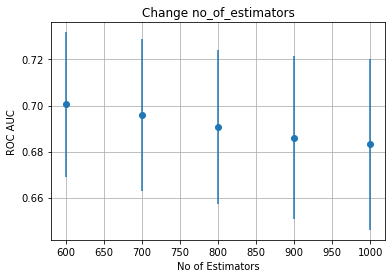

In [14]:
title = 'Change no_of_estimators'
xlabel = 'No of Estimators'
n_estimators = [600,700,800,900,1000]
means = []
stddevs = []

for n in tqdm(n_estimators):
    clf = GradientBoostingClassifier(random_state=seed,
                          n_estimators=n,learning_rate=0.1)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)

plot_cross_validation(title, n_estimators, means, stddevs, xlabel)
plt.savefig('GradientBoost_no_of_estimators.png', bbox_inches='tight')
plt.show()

# chnage learning_rate

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:21<00:00, 47.02s/it]


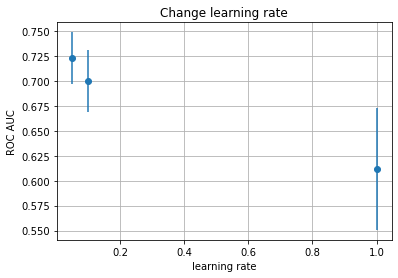

In [15]:
title = 'Change learning rate'
xlabel = 'learning rate'
learning_rate = [0.1,0.05,1.0]
means = []
stddevs = []

for n in tqdm(learning_rate):
    clf = GradientBoostingClassifier(random_state=0,
                          n_estimators=600,learning_rate=n)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)

plot_cross_validation(title, learning_rate, means, stddevs, xlabel)
plt.savefig('GradientBoost_learning_rate.png', bbox_inches='tight')
plt.show()

# ROC_AUC

In [16]:
# Best params
from sklearn.metrics import roc_auc_score, accuracy_score

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.05,n_estimators=600, 
                              random_state=rng)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('ROC AUC on test set: ', roc_auc_score(y_test, y_pred))

Accuracy on test set:  0.74780526735834
ROC AUC on test set:  0.7387029559455401


# Confusion matrix

C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


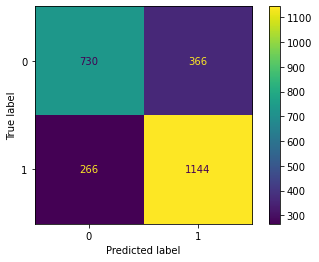

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gbc, X_test, y_test)
plt.savefig('GBC_confmat.png')